1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(y)

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$
$$a = \overline{y} - b \cdot {\overline{x}}.$$
$$r_{xy} = \frac{\sum\limits_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum\limits_{i=1}^{n} (x_i - \overline{x})^2 \cdot {\sum\limits_{i=1}^{n} (y_i - \overline{y})^2}}} = b \cdot {\frac{\sigma_x}{\sigma_y}}$$

In [3]:
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b

2.620538882402765

In [4]:
a = np.mean(y) - b * np.mean(x)
a

444.1773573243596

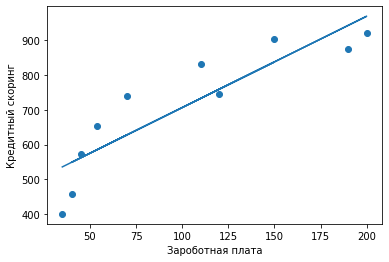

In [5]:
plt.scatter(x, y)
plt.plot(x, a + b * x)
plt.xlabel('Зароботная плата')
plt.ylabel('Кредитный скоринг')
plt.show()

In [6]:
x_two = np.reshape(x, (10, 1))
y_two = np.reshape(y, (10, 1))

In [7]:
np.dot(np.linalg.inv(np.dot(x_two.T, x_two)), x_two.T@y_two)

array([[5.88982042]])

In [8]:
x_two = np.hstack([np.ones((10, 1)), x_two])

In [9]:
np.dot(np.linalg.inv(np.dot(x_two.T, x_two)), x_two.T@y_two)

array([[444.17735732],
       [  2.62053888]])

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [10]:
alpha = 1e-6
B1 = 0.1
def mse_(B1, y=y, X=x, n=10):
    return np.sum((B1 * X - y) ** 2) / n

In [11]:
for i in range(1000):
    B1 -= alpha * (2/n)* np.sum((B1 * x - y) * x)
    if i % 100 == 0:
        print(f' {i}, B1 : {B1}, mse: {mse_(B1) }')

 0, B1 : 0.25952808, mse: 493237.7212546963
 100, B1 : 5.54537842245223, mse: 58151.31823171113
 200, B1 : 5.868748638669329, mse: 56522.97550129376
 300, B1 : 5.888531320728348, mse: 56516.88130936019
 400, B1 : 5.8897415574471985, mse: 56516.85850140053
 500, B1 : 5.889815595583751, mse: 56516.858416040064
 600, B1 : 5.889820124983314, mse: 56516.85841572062
 700, B1 : 5.889820402076462, mse: 56516.85841571941
 800, B1 : 5.88982041902807, mse: 56516.8584157194
 900, B1 : 5.889820420065112, mse: 56516.85841571941


In [12]:
mse_(5.88982042)

56516.85841571943

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

По таблице Стьюдента ищем когда не знаем дисперсию нулевой выборки и при большом объеме данных

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [13]:
def mse_two(A1, B1, y=y, X=x, n=10):
    return np.sum(((A1 + B1 * X) - y) ** 2) / n
A1=1
beta=0.5
alpha = 1e-5

In [14]:
for i in range(1000):
    A1 -= beta * (1/n)* np.sum((A1 + B1 * x) - y)
    for l in range(2000):
        B1 -= alpha * (2/n)* np.sum(((A1 + B1 * x) - y) * x)
    if i % 100 == 0:
        print(f' A{i}B{l}, A1,: {A1}, B1 : {B1}, mse: {mse_two(A1, B1) }')
print(f' A{i}B{l}, A1,: {A1}, B1 : {B1}, mse: {mse_two(A1, B1) }')

 A0B1999, A1,: 56.83610469948824, B1 : 5.471489263205138, mse: 44528.58405070672
 A100B1999, A1,: 444.17685860957397, B1 : 2.6205425530964974, mse: 6470.414201239748
 A200B1999, A1,: 444.1773573237173, B1 : 2.6205388824074936, mse: 6470.414201176663
 A300B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A400B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A500B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A600B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A700B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A800B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A900B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657
 A999B1999, A1,: 444.17735732435926, B1 : 2.6205388824027684, mse: 6470.414201176657


In [15]:
a

444.1773573243596

In [16]:
b

2.620538882402765